# DIABOLO


In [77]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
#from  pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)

import pandas as pd
import numpy as np

import platform
import sys

import sklearn


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn import svm, datasets

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib


from treeinterpreter import treeinterpreter as ti

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from itertools import *

import graphviz as gv

import pydotplus
import io
from scipy import misc



# environnement

In [78]:
print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)

Operating system version.... Windows-10-10.0.16299-SP0
Python version is........... 3.6.3
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.13.3
matplotlib version is....... 2.1.2


# PROCEDURES

In [90]:
# SELCTION DATAFRAME
def ConstruireDataFrame_one(df):
    
    df_gagnant = df    
    
    # les lignes sans GAIN sont éliminées
    df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >0] # On garde les lignes avec GAIN
    
    #les lignes sans arrivée n'apporte rien
    df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0] # On garde la ligne qui possede information arrivée

    print(df_gagnant.shape)
    return df_gagnant


def CorrelationDesVariable(df_gagnant):
    
    fig2, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=0.5, ax=ax)
    plt.show()
    
    #--------------------------SEPARATION DES DONNES------------------------------
def split_dataset(dataset, train_percentage, feature_headers, target_header):

    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers],  dataset[target_header],
                                                        train_size=train_percentage, random_state=42)
     # Train and Test dataset size details
    print ("Train_x Shape :: ", train_x.shape)    
    print ("Train_y Shape :: ", train_y.shape)
    print ("Test_x Shape :: ", test_x.shape)    
    print ("Test_y Shape :: ", test_y.shape)
    
    
    return train_x, test_x, train_y, test_y

    #---------------CLASSIFICATION FOREST------------------------


def classificationTree(criterion, splitter,max_leaf_nodes, min_samples_split):    
    #ESTIMATEUR : arbre avec classification
    
    #### c=DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=17,min_samples_split=5000)
    
    c=DecisionTreeClassifier(criterion,splitter, max_leaf_nodes,min_samples_split)
    print(c.class_weight)
    
    
    
    
    return c



# Définir une classe TIme au temps d'exécution total de l'ordinateur
class Timer:
  def __init__(self):
    self.start = time.time()

  def restart(self):
    self.start = time.time()

  def get_time(self):
    end = time.time()
    m, s = divmod(end - self.start, 60)
    h, m = divmod(m, 60)
    time_str = "%02d:%02d:%02d" % (h, m, s)
    return time_str
#---------------------------------------------------------------------------------
def show_arbre(arbre, my_Features, path):
    
    f=io.StringIO()

    
    export_graphviz(arbre, out_file=f, feature_names=my_Features,class_names=["0","1"],filled=1,
                    label="all",impurity=1,proportion=1,rotate=1,rounded=1 )
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(img)
    
    plt.show()
    
#--------------------------------------------------------------------------------------
def lecture_data(Fichier, xnames, xindex_col):
    
                    df=pd.read_csv (Fichier,
                                       index_col=xindex_col, 
                                       sep=';',
                                       names=xnames,skipinitialspace=True,
                                       encoding='Latin-1' )
                        
       
                    #Suppression de la collone TROT
                    df.drop(["FIN_ligne"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["PAR_NP"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                 #   df.drop(["PAR_COTEDER"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["cendre"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    ##df.drop(["autostart"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["grande_piste"], axis=1, inplace=True)
                    df.drop(["CO_DISTANCE"], axis=1, inplace=True)
                    df.drop(["musique"], axis=1, inplace=True)
                    return df 



    

#  LECTURE DES DONNES

In [85]:
xnames=['ALLURE'
                    ,'CO_DISTANCE',
                    'CO_PRIX',
                    'IDCOURSE',
                    'IDPARTCIPANT',
                    'PAR_ARRIVE',
                    'PAR_CARRIERE',
                    'PAR_CARRIERE_Q' ,
                    'PAR_CLASSE_AGE',
                    'PAR_COTEDER',
                    'PAR_ENT_ECART_GAGNANT',
                    'PAR_ENT_RAPPORT_GAGNANT_M',
                    'PAR_ENT_REU_PLACE',
                    'PAR_ENT_REUSSITE_GAGNE',
                    'PAR_ENT_VICTOIRE',
                    'PAR_GAIN',
                    'pAR_JOC_ECART_GAGNANT',
                    'PAR_JOC_ECART_PLACE',
                    'PAR_JOC_NB_COURSE',
                    'PAR_JOC_PLACE_3P',
                    'pAR_JOC_RAPPORT_GAGNANT_M',
                    'PAR_JOC_REU_PLACE',
                    'pAR_JOC_REUSSITE_GAGNE',
                    'pAR_JOC_VICTOIRE',
                    'PAR_NP',
                    'PAR_NUM',
                    'PAR_PLACE',
                    'PAR_PLACE_Q',
                    'PAR_REUSSITE_3P',
                    'PAR_REUSSITE_GAGNE',
                    'PAR_REUSSITE_QUINTE',
                    'PAR_RUESSITE_PLACE',
                    'autostart',
                    'cendre',
                    'grande_piste',
                    'Point',
                    'Nb_partant','musique','FIN_ligne']

df=lecture_data('d:\diabollo_al_1.csv',xnames,['IDPARTCIPANT','IDCOURSE','PAR_NUM'])

df_numero_a_predire=lecture_data('d:\diabollo_al_1_D.csv',xnames,['IDPARTCIPANT','IDCOURSE','PAR_NUM'])

print(" df ",df.shape)
print("")
print(" df_numero_a_predire ",df_numero_a_predire.shape)
print(df.dtypes) # lignes = observations

df.head(100)

 df  (440349, 30)

 df_numero_a_predire  (543, 30)
ALLURE                       float64
CO_PRIX                      float64
PAR_ARRIVE                   float64
PAR_CARRIERE                 float64
PAR_CARRIERE_Q               float64
PAR_CLASSE_AGE               float64
PAR_COTEDER                  float64
PAR_ENT_ECART_GAGNANT        float64
PAR_ENT_RAPPORT_GAGNANT_M    float64
PAR_ENT_REU_PLACE            float64
PAR_ENT_REUSSITE_GAGNE       float64
PAR_ENT_VICTOIRE             float64
PAR_GAIN                     float64
pAR_JOC_ECART_GAGNANT        float64
PAR_JOC_ECART_PLACE          float64
PAR_JOC_NB_COURSE            float64
PAR_JOC_PLACE_3P             float64
pAR_JOC_RAPPORT_GAGNANT_M    float64
PAR_JOC_REU_PLACE            float64
pAR_JOC_REUSSITE_GAGNE       float64
pAR_JOC_VICTOIRE             float64
PAR_PLACE                    float64
PAR_PLACE_Q                  float64
PAR_REUSSITE_3P              float64
PAR_REUSSITE_GAGNE           float64
PAR_REUSSITE_QUINTE     

,,,ALLURE,CO_PRIX,PAR_ARRIVE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,...,pAR_JOC_VICTOIRE,PAR_PLACE,PAR_PLACE_Q,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,autostart,Point,Nb_partant
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,,,,,,,,,,,,,,,,,,
563653.0,45585.0,3.0,1.0,95000.0,4.0,73.0,11.0,37764.0,14.0,1.0,5.71,0.27,...,1.0,10.0,1.0,0.205480,0.068493,0.000000,0.136986,1.0,196.0,13.0
563909.0,45607.0,8.0,1.0,5000.0,99.0,35.0,0.0,933.0,61.0,15.0,4.72,0.30,...,2.0,2.0,0.0,0.085714,0.028571,0.000000,0.057143,1.0,156.0,14.0
563654.0,45585.0,4.0,1.0,95000.0,1.0,57.0,14.0,36756.0,5.0,10.0,14.40,0.20,...,61.0,10.0,2.0,0.350877,0.175439,0.017544,0.175439,1.0,231.0,13.0
563910.0,45607.0,9.0,1.0,5000.0,99.0,30.0,0.0,975.0,87.0,0.0,0.00,0.06,...,0.0,2.0,0.0,0.100000,0.033333,0.000000,0.066667,1.0,66.0,14.0
563655.0,45585.0,5.0,1.0,95000.0,99.0,66.0,15.0,34724.0,9.0,0.0,0.00,0.00,...,4.0,11.0,5.0,0.303030,0.136364,0.030303,0.166667,1.0,198.0,13.0
563911.0,45607.0,10.0,1.0,5000.0,99.0,41.0,0.0,956.0,21.0,29.0,18.00,0.20,...,5.0,9.0,0.0,0.243902,0.024390,0.000000,0.219512,1.0,213.0,14.0
563656.0,45585.0,6.0,1.0,95000.0,3.0,54.0,4.0,36726.0,3.0,0.0,0.00,0.33,...,46.0,18.0,1.0,0.629630,0.296296,0.018519,0.333333,1.0,218.0,13.0
563912.0,45607.0,11.0,1.0,5000.0,99.0,37.0,0.0,1339.0,134.0,17.0,3.20,0.16,...,18.0,2.0,0.0,0.135135,0.081081,0.000000,0.054054,1.0,215.0,14.0
563657.0,45585.0,7.0,1.0,95000.0,5.0,93.0,12.0,35289.0,23.0,0.0,0.00,0.04,...,180.0,22.0,3.0,0.311828,0.075269,0.000000,0.236559,1.0,234.0,13.0


In [86]:
df=df.groupby("ALLURE")     
df=df.get_group(1) 
#Suppression de la collone TROT
df.drop(["ALLURE"], axis=1, inplace=True)





In [87]:
df_numero_a_predire=df_numero_a_predire.groupby("ALLURE") 

df_numero_a_predire=df_numero_a_predire.get_group(1) 

#Suppression de la collone TROT
df_numero_a_predire.drop(["ALLURE"], axis=1, inplace=True)


In [88]:
print(" df ",df.shape)
print("")
print(" df_numero_a_predire ",df_numero_a_predire.shape)

 df  (210282, 29)

 df_numero_a_predire  (368, 29)


La normalisation des ensembles de données est une exigence courante pour de nombreux estimateurs d'apprentissage automatique mis en œuvre dans scikit-learn; 
ils peuvent se comporter mal 
si les caractéristiques individuelles ne ressemblent pas plus ou moins à des données standard normalement distribuées: gaussiennes avec une moyenne nulle et une variance unitaire .

# CORRELATION DES DONNEES

In [73]:
# trvail sur les courses de trot (allure=1)
# dimensions

print(df.shape) # lignes = observations
print(df.dtypes) # lignes = observations


(210282, 29)
CO_PRIX                      float64
PAR_ARRIVE                   float64
PAR_CARRIERE                 float64
PAR_CARRIERE_Q               float64
PAR_CLASSE_AGE               float64
PAR_COTEDER                  float64
PAR_ENT_ECART_GAGNANT        float64
PAR_ENT_RAPPORT_GAGNANT_M    float64
PAR_ENT_REU_PLACE            float64
PAR_ENT_REUSSITE_GAGNE       float64
PAR_ENT_VICTOIRE             float64
PAR_GAIN                     float64
pAR_JOC_ECART_GAGNANT        float64
PAR_JOC_ECART_PLACE          float64
PAR_JOC_NB_COURSE            float64
PAR_JOC_PLACE_3P             float64
pAR_JOC_RAPPORT_GAGNANT_M    float64
PAR_JOC_REU_PLACE            float64
pAR_JOC_REUSSITE_GAGNE       float64
pAR_JOC_VICTOIRE             float64
PAR_PLACE                    float64
PAR_PLACE_Q                  float64
PAR_REUSSITE_3P              float64
PAR_REUSSITE_GAGNE           float64
PAR_REUSSITE_QUINTE          float64
PAR_RUESSITE_PLACE           float64
autostart                

L’analyse univariée permet d’explorer une seule feature à la fois. 
Cette analyse se base sur les statistiques descriptives.
Ces dernières permettent de tirer des indications concises sur une feature donnée.
Parmi ces indicateurs, on retrouve la moyenne, la médiane ainsi que les mesures de dispersion de données.

Petite exploration dur la variable PAR_REUSSITE_3P

VARIANCE : 
indique de quelle manière la série de données d’une feature se disperse autour de la moyenne. Une variance élevée indique que les valeurs sont très écartées les unes des autres et vice versa.

écart type : 
L’écart type est aussi une mesure de dispersion des données. Il est tout simplement la racine carrée de la variance. On utilise souvent l’écart type que la variance pour mieux appréhender le degré de dispersion des données.

# TYPAGE du DATAFRAME AVEC ARRIVE

# DF_GAGNANT

In [8]:
#gagnant
#sélection des chevaux dans les 5 premiers


df_gagnant = df

# ne sert pas pour calcul
#df_gagnant.drop(["IDPARTCIPANT"], axis=1, inplace=True)
#df_gagnant.drop(["IDCOURSE"], axis=1, inplace=True)
#df_gagnant.drop(["PAR_NUM"], axis=1, inplace=True)



# les lignes sans GAIN sont éliminées
df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >0] # On garde les lignes avec GAIN
df_gagnant=df_gagnant[df_gagnant.PAR_GAIN <1000000] # On garde les lignes avec GAIN


#df_gagnant=df_gagnant[df_gagnant.Nb_partant >5] # On garde les lignes avec GAIN
#df_gagnant=df_gagnant[df_gagnant.Nb_partant <16] # On garde les lignes avec GAIN
#df_gagnant.drop(["Nb_partant"], axis=1, inplace=True)

#les lignes sans arrivée n'apporte rien
df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0] # On garde la ligne qui possede information arrivée
#df_gagnant=df_gagnant[df_gagnant.CO_PRIX<50000] # On garde la ligne qui possede information arrivée
# trvail sur les courses de trot (allure=1)
print(df.shape) # description de l'ensemble
print(df_gagnant.shape) # description de l'ensemble



(210282, 29)
(188840, 29)


In [9]:



COLUM=df_gagnant.columns
COLUM



Index(['CO_PRIX', 'PAR_ARRIVE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q',
       'PAR_CLASSE_AGE', 'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT',
       'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE',
       'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'PAR_GAIN',
       'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE',
       'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE',
       'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_PLACE',
       'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'autostart', 'Point',
       'Nb_partant'],
      dtype='object')

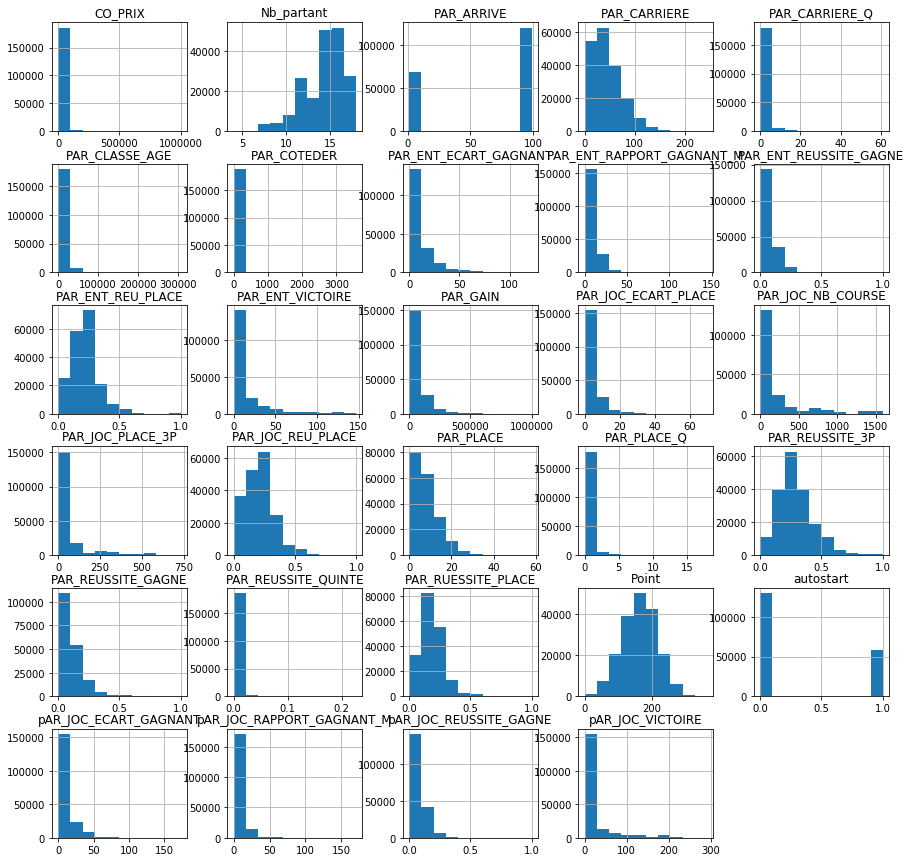

In [10]:
pd.DataFrame.hist(df_gagnant, figsize = [15,15]);

In [11]:
df_gagnant['PAR_COTEDER'].describe()


count    188840.000000
mean         31.546267
std          45.386571
min           0.000000
25%           8.000000
50%          17.000000
75%          36.000000
max        3585.000000
Name: PAR_COTEDER, dtype: float64

# CORRELATION DES DONNEE AVEC CHEVAUX PARMI LES 3 PREMIERS

In [12]:
# Creating bins for the win column
def assign_selection(W):
    
    if W >=1 and W <=3:
        return 1
    if W >3:
        return 0
    


In [13]:

#df_gagnant['SELECTION'] = (df_gagnant.PAR_ARRIVE<=3).astype(int)
df_gagnant['SELECTION'] = df_gagnant['PAR_ARRIVE'].apply(assign_selection)
#Suppression de la colonne PAR_ARRIVE
#longueur
nb=len(df_gagnant)

# pour chaque ligne du df_gagnant
#for i in xrange(df_gagnant):




#Suppression de la PAR_ARRIVE
# Elle ne sert plus
#df_gagnant.drop(["IDPARTCIPANT"], axis=1, inplace=True)
#df_gagnant.drop(["IDCOURSE"], axis=1, inplace=True)
df_gagnant.drop(["PAR_ARRIVE"], axis=1, inplace=True)
df_gagnant.drop(["Nb_partant"], axis=1, inplace=True)
df_gagnant.drop(["autostart"], axis=1, inplace=True)




print(df_gagnant.shape) # description de l'ensemble

(188840, 27)


# Les plus forte correlations avec SELECTION sont :

 PAR_REUSSITE_3P
 Point
 PAR_JOC_REU_PLACE


PAR_REUSSITE_GAGNE
PAR_ENT_REU_PLACE
PAR_JOC_REUSSITE_GAGNE
PAR_ENT_REUSSITE_GAGNE
PAR_JOC_NB_COURSE
PAR_JOC_PLACE_3P
PAR_JOC_VICTOIRE
PAR_ENT_VICTOIRE







In [14]:

COLUM=df_gagnant.columns
print(COLUM)
print(df_gagnant.shape) # description de l'ensemble


Index(['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'SELECTION'],
      dtype='object')
(188840, 27)


In [15]:
print(df_gagnant.shape) # description de l'ensemble
Lib_features = list(df_gagnant.columns[:26]) # Liebllé des variable DATA
print(Lib_features)
lib_cible =  "SELECTION" # libellé de la variable CIBLE
my_Features=["Point","PAR_COTEDER"]
##my_Features=["PAR_REUSSITE_3P","Point","PAR_JOC_REU_PLACE","PAR_REUSSITE_GAGNE","PAR_ENT_REU_PLACE","PAR_ENT_VICTOIRE"]
#Lib_features=my_Features
#my_Features = Lib_features
#Lib_features=my_Features

(188840, 27)
['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE', 'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point']


In [16]:
#Normalisation

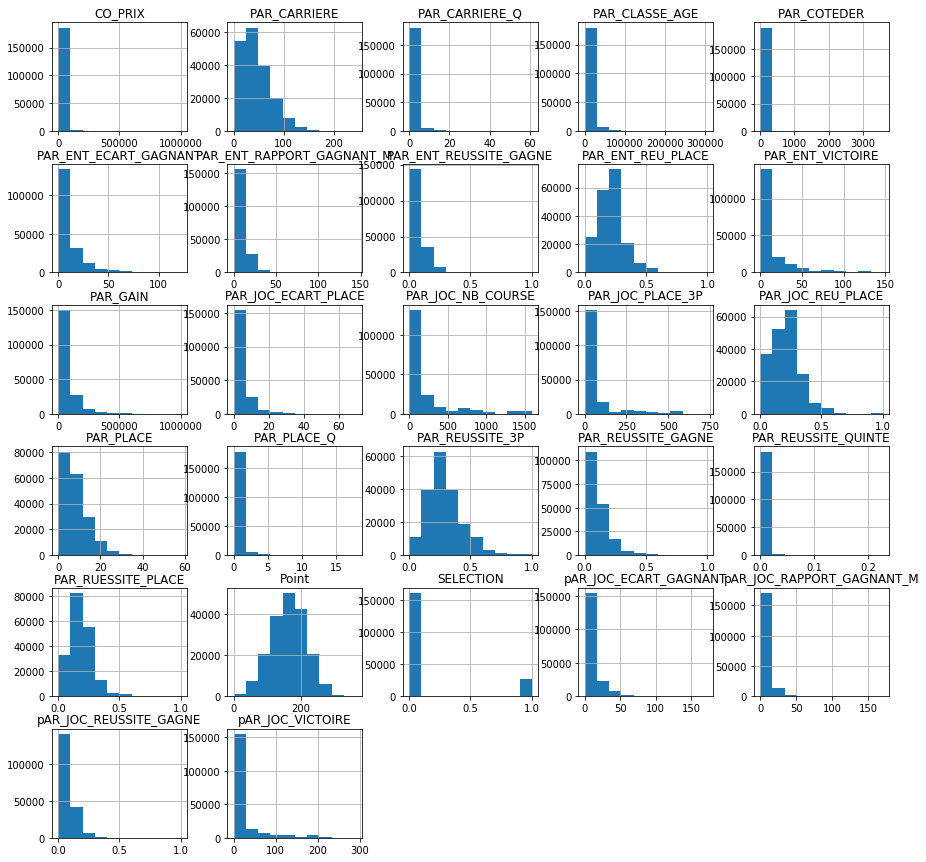

In [17]:
pd.DataFrame.hist(df_gagnant, figsize = [15,15]);

#  SEPARATION DES DONNEES

# Training et Test

In [18]:
df_scale = df_gagnant.copy()


train_x, test_x, train_y, test_y = split_dataset(df_gagnant, 0.8, Lib_features, lib_cible)    

#print(df_gagnant.columns) # description de l'ensemble
print(train_x.columns) # description de l'ensemble

Train_x Shape ::  (151072, 26)
Train_y Shape ::  (151072,)
Test_x Shape ::  (37768, 26)
Test_y Shape ::  (37768,)
Index(['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_COTEDER', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()
train_x=mms.fit_transform(train_x)
test_x=mms.transform(test_x)


In [20]:
train_x[0]

array([-0.23993962, -1.21198798, -0.2937218 , -0.85889731,  0.23304977,
       -0.74099162, -0.9691605 , -1.78210278, -1.06719966, -0.62331413,
       -0.76414778,  0.05735554,  0.63238506, -0.55331526, -0.48481535,
       -0.08596518, -0.01151731,  0.25534046, -0.45356101, -1.28273558,
       -0.2491869 , -1.9523756 , -1.07079979, -0.15791196, -1.80783876,
       -2.16235317])

In [89]:



from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from time import time

In [22]:
# Utility function to report best scores
def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
          
            print("")            

# hyper parametres

In [23]:
# specify parameters and distributions to sample from
param_dist = {"max_leaf_nodes": [None,100,1000,1500,2000,2100,2500, 4000,5000],
              "min_samples_leaf": [50,100,500,1000,200,1000,4000,500],
                "splitter" : ("best", "random"),
                 "random_state": [None,15,20,30,42],
              "criterion": ["gini", "entropy"]}

# Construction de l'estimateur

In [ ]:
# build a classifier
clf = DecisionTreeClassifier(class_weight = 'balanced')


# Iteration de l'estimateur avec RandomizeSearch

In [ ]:
my_timer = Timer()
n_iter_search = 10
estimator = RandomizedSearchCV(clf,
                                   param_distributions = param_dist,
                                   n_iter = n_iter_search)                                                  
elapsed = my_timer.get_time()
print("\nTemps de calcul est : %s" % elapsed) 

In [24]:
#n_iter_search = 20
#random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
#                                   n_iter=n_iter_search)

# FIT

In [ ]:
  fit = estimator.fit(train_x, y_train_y)
    

In [25]:

start = time()
random_search.fit(train_x, train_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV took 56.39 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.860 (std: 0.001)
Parameters: {'splitter': 'best', 'random_state': None, 'min_samples_leaf': 200, 'max_leaf_nodes': 2000, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 2
Mean validation score: 0.860 (std: 0.000)
Parameters: {'splitter': 'best', 'random_state': 15, 'min_samples_leaf': 1000, 'max_leaf_nodes': 2500, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 2
Mean validation score: 0.860 (std: 0.000)
Parameters: {'splitter': 'best', 'random_state': 20, 'min_samples_leaf': 1000, 'max_leaf_nodes': 2500, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 4
Mean validation score: 0.858 (std: 0.001)
Parameters: {'splitter': 'random', 'random_state': None, 'min_samples_leaf': 50, 'max_leaf_nodes': 100, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 5
Mean validation score: 0.858 (std: 0.000)
Parameters: {'spl

 # ESTIMATEUR  :  arbre avec classification
 
 Les arbres binaires de décision (CART : classification and regression trees)
s’appliquent à tous types de variables. Les options de l’algorithme sont dé-
crites dans la documentation. La complexité du modèle est gérée par deux paramètres
: max_depth, qui détermine le nombre max de feuilles dans l’arbre,
et le nombre minimales min_samples_split d’observations requises pour
rechercher une dichotomie.


# POIDS DES CLASSE

In [26]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', np.unique(train_y), train_y)
class_weight


array([ 0.58467111,  3.45260079])

In [27]:
#### c=DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=17,min_samples_split=5000)
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


#c=DecisionTreeClassifier(criterion='entropy',random_state=15,max_leaf_nodes=1500,min_samples_split=500,class_weight={0:0.58,1:3.45})
c=DecisionTreeClassifier(criterion='gini',random_state=None,max_leaf_nodes=1000,min_samples_split=1000,class_weight='balanced')
#c=DecisionTreeClassifier(criterion='entropy',random_state=42,max_leaf_nodes=None,min_samples_split=200)


#criterion = La fonction pour mesurer la qualité d'une scission. 
#Les critères supportés sont "gini" pour l'impureté de Gini et "entropy" pour le gain d'information.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [28]:
dt=c.fit(train_x, train_y)
#CLASSE NAMES
print( c.classes_)

[0 1]


# PREDICTION

In [29]:
y_pred=c.predict(test_x)
print(y_pred)


[0 0 0 ..., 0 0 0]


# PROBA  = Ensemble des probabilités de X_TEST

In [30]:
PROBA=c.predict_proba(test_x)
PROBAL=c.predict_log_proba(test_x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py:864: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


# DONNEES DE TEST = X_TEST

In [31]:
data_frame_proba = pd.DataFrame.from_dict(PROBA)
data_frame_proba.head(100)

,0,1
0,0.919788,0.080212
1,0.591557,0.408443
2,0.636048,0.363952
3,0.941824,0.058176
4,0.445211,0.554789
5,0.361356,0.638644
6,0.767360,0.232640
7,0.731346,0.268654
8,1.000000,0.000000
9,0.970252,0.029748


# SCORE

In [32]:

score=accuracy_score(test_y,y_pred) * 100


In [33]:
score

70.173162465579324

# CALCUL d'OPTIMISATION DES PARAMETRES

# MATRICE DE CONFUSION

In [34]:
# Optimisation du paramètre de complexité du modèle par validation croisée 

In [35]:
pd.crosstab(test_y, y_pred, rownames=['True'], colnames=['Prediction'], margins=True)

# LES ELEMENTS DIAGONAUX INDIQUE UNE BONNE CLASSIFICATION

Prediction,0,1,All
True,,,
0,22630,9654,32284
1,1611,3873,5484
All,24241,13527,37768


In [36]:
 # EN POURCENTAGE

In [37]:
pd.crosstab(test_y, y_pred, rownames=['True'], colnames=['Prediction']).apply(lambda r: 100.0 * r/r.sum())
# LES ELEMENTS DIAGONAUX INDIQUE UNE BONNE CLASSIFICATION  : avec POURCENTAGE

Prediction,0,1
True,,
0,93.354235,71.368374
1,6.645765,28.631626


In [38]:
PROBA[1]
PROBA


array([[ 0.91978752,  0.08021248],
       [ 0.59155694,  0.40844306],
       [ 0.63604757,  0.36395243],
       ..., 
       [ 1.        ,  0.        ],
       [ 0.62726044,  0.37273956],
       [ 0.51108328,  0.48891672]])

# analyse de l'importance des features

# JOUER

In [39]:

df_numero_a_predire[lib_cible] =0
train_x, test_x, train_y, test_y = split_dataset(df_numero_a_predire, 0, Lib_features, lib_cible)   

test_copy = test_x.copy()

test_x.head()

Train_x Shape ::  (0, 26)
Train_y Shape ::  (0,)
Test_x Shape ::  (368, 26)
Test_y Shape ::  (368,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,,,CO_PRIX,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,...,PAR_JOC_REU_PLACE,pAR_JOC_REUSSITE_GAGNE,pAR_JOC_VICTOIRE,PAR_PLACE,PAR_PLACE_Q,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,Point
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,,,,,,,,,,,,,,,,,,
584210.0,47254.0,5.0,19000.0,25.0,0.0,3540.0,9.0,9.0,16.38,0.20,0.06,8.0,...,0.07,0.00,0.0,3.0,0.0,0.160000,0.040000,0.0,0.120000,104.0
584386.0,47267.0,12.0,12000.0,13.0,0.0,1875.0,13.0,0.0,0.00,0.09,0.00,0.0,...,0.09,0.00,0.0,2.0,0.0,0.153846,0.000000,0.0,0.153846,78.0
584119.0,47248.0,8.0,21000.0,18.0,0.0,8742.0,7.0,0.0,11.44,0.21,0.08,28.0,...,0.26,0.09,10.0,5.0,0.0,0.500000,0.222222,0.0,0.277778,246.0
584332.0,47264.0,5.0,15000.0,46.0,0.0,8228.0,21.0,0.0,9.53,0.16,0.06,6.0,...,0.10,0.02,2.0,5.0,0.0,0.152174,0.043478,0.0,0.108696,147.0
584401.0,47268.0,6.0,12000.0,8.0,0.0,830.0,9.0,1.0,6.41,0.20,0.05,9.0,...,0.16,0.04,5.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,109.0


In [40]:
#from sklearn.preprocessing import MinMaxScaler
#mms=MinMaxScaler()
#test_x=mms.fit_transform(test_x)
#test_x=mms.transform(test_x)

from sklearn.preprocessing import StandardScaler
mms=StandardScaler()
test_x=mms.fit_transform(test_x)
#test_x=mms.transform(test_x)


In [41]:
y_pred=c.predict(test_x)


In [42]:

df_pred = pd.DataFrame.from_dict(y_pred)
#print(df_pred)
print(y_pred)


[1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1]


In [43]:
PROBA=c.predict_proba(test_x)


df_proba = pd.DataFrame.from_dict(PROBA)



In [44]:
# ajouter a test_x les collone 0 et 1 (probabilité)


df_final =pd.concat([df_proba,df_pred], axis=1)


print(df_final)



            0         1  0
0    0.366039  0.633961  1
1    0.921033  0.078967  0
2    0.370541  0.629459  1
3    0.843350  0.156650  0
4    0.648310  0.351690  0
5    0.370541  0.629459  1
6    0.646890  0.353110  0
7    0.926328  0.073672  0
8    0.370541  0.629459  1
9    0.935572  0.064428  0
10   0.434694  0.565306  1
11   1.000000  0.000000  0
12   0.636048  0.363952  0
13   0.926328  0.073672  0
14   0.893897  0.106103  0
15   0.276784  0.723216  1
16   0.860194  0.139806  0
17   0.477294  0.522706  1
18   0.962204  0.037796  0
19   0.174229  0.825771  1
20   0.521732  0.478268  0
21   0.328338  0.671662  1
22   0.481039  0.518961  1
23   0.320289  0.679711  1
24   0.738382  0.261618  0
25   0.656704  0.343296  0
26   0.370541  0.629459  1
27   0.877752  0.122248  0
28   0.955982  0.044018  0
29   0.869882  0.130118  0
..        ...       ... ..
338  0.603816  0.396184  0
339  1.000000  0.000000  0
340  0.484946  0.515054  1
341  0.791990  0.208010  0
342  0.730420  0.269580  0
3

In [45]:
test_x = test_copy.copy()

In [46]:
def my_drop(df,col):
    if col in df:
        df.drop([col], axis=1, inplace=True)
    return df    

In [54]:
test_x=my_drop(test_x,'PAR_CLASSE_AGE')
test_x=my_drop(test_x,'PAR_ENT_ECART_GAGNANT')
test_x=my_drop(test_x,'PAR_ENT_RAPPORT_GAGNANT_M')
test_x=my_drop(test_x,'PAR_ENT_REU_PLACE')
test_x=my_drop(test_x,'PAR_ENT_REUSSITE_GAGNE')
test_x=my_drop(test_x,'PAR_ENT_VICTOIRE')
test_x=my_drop(test_x,'PAR_GAIN')
test_x=my_drop(test_x,'pAR_JOC_ECART_GAGNANT')
test_x=my_drop(test_x,'PAR_JOC_ECART_PLACE')
test_x=my_drop(test_x,'PAR_JOC_NB_COURSE')
test_x=my_drop(test_x,'PAR_JOC_PLACE_3P')
test_x=my_drop(test_x,'PAR_REUSSITE_GAGNE')
test_x=my_drop(test_x,'PAR_REUSSITE_QUINTE')
test_x=my_drop(test_x,'PAR_RUESSITE_PLACE')
test_x=my_drop(test_x,'CO_PRIX')
test_x=my_drop(test_x,'PAR_CARRIERE')
test_x=my_drop(test_x,'PAR_CARRIERE_Q')
test_x=my_drop(test_x,'pAR_JOC_RAPPORT_GAGNANT_M')
test_x=my_drop(test_x,'pAR_JOC_REUSSITE_GAGNE')
test_x=my_drop(test_x,'pAR_JOC_VICTOIRE')
test_x=my_drop(test_x,'PAR_PLACE')
test_x=my_drop(test_x,'PAR_PLACE_Q')
test_x=my_drop(test_x,'PAR_CLASSE_AGE')
test_x=my_drop(test_x,'pAR_JOC_VICTOIRE')
test_x=my_drop(test_x,'PAR_REUSSITE_3P')
test_x=my_drop(test_x,'PAR_JOC_REU_PLACE')
test_x=my_drop(test_x,'PAR_COTEDER')
test_x=my_drop(test_x,'musique')

test_x


,,,Point,v0,v1,sel
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,
584210.0,47254.0,5.0,104.0,0.366039,0.633961,0
584386.0,47267.0,12.0,78.0,0.921033,0.078967,0
584119.0,47248.0,8.0,246.0,0.370541,0.629459,0
584332.0,47264.0,5.0,147.0,0.843350,0.156650,0
584401.0,47268.0,6.0,109.0,0.648310,0.351690,0
583991.0,47239.0,9.0,226.0,0.370541,0.629459,0
584159.0,47251.0,9.0,191.0,0.646890,0.353110,0
584186.0,47252.0,11.0,166.0,0.926328,0.073672,0
583948.0,47235.0,4.0,211.0,0.370541,0.629459,0


In [48]:






#test_x.drop(["autostart"], axis=1, inplace=True)
#test_x.drop(["Point"], axis=1, inplace=True)
#test_x.drop(["Nb_partant"], axis=1, inplace=True)





In [49]:
print(test_x.columns)



Index(['Point'], dtype='object')


In [50]:
test_x['v0']=0.0
test_x['v1']=0.0
test_x['sel']=0
test_x



,,,Point,v0,v1,sel
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,
584210.0,47254.0,5.0,104.0,0.0,0.0,0
584386.0,47267.0,12.0,78.0,0.0,0.0,0
584119.0,47248.0,8.0,246.0,0.0,0.0,0
584332.0,47264.0,5.0,147.0,0.0,0.0,0
584401.0,47268.0,6.0,109.0,0.0,0.0,0
583991.0,47239.0,9.0,226.0,0.0,0.0,0
584159.0,47251.0,9.0,191.0,0.0,0.0,0
584186.0,47252.0,11.0,166.0,0.0,0.0,0
583948.0,47235.0,4.0,211.0,0.0,0.0,0


In [51]:
cumul=1

nb_rows=len(df_proba.index)

for i in range(0,nb_rows):
    n=df_proba[0][i]
    test_x['v0'][i]=n    
    n=df_proba[1][i]
    test_x['v1'][i]=n      
    #i +=1
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
test_x

,,,Point,v0,v1,sel
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,
584210.0,47254.0,5.0,104.0,0.366039,0.633961,0
584386.0,47267.0,12.0,78.0,0.921033,0.078967,0
584119.0,47248.0,8.0,246.0,0.370541,0.629459,0
584332.0,47264.0,5.0,147.0,0.843350,0.156650,0
584401.0,47268.0,6.0,109.0,0.648310,0.351690,0
583991.0,47239.0,9.0,226.0,0.370541,0.629459,0
584159.0,47251.0,9.0,191.0,0.646890,0.353110,0
584186.0,47252.0,11.0,166.0,0.926328,0.073672,0
583948.0,47235.0,4.0,211.0,0.370541,0.629459,0


In [53]:
test_x.to_csv('d:\py_resultat.csv')

